#  Classification avec des images réelles: dogs vs cats


Le dataset complet provient d'une compétition Kaggle: https://www.kaggle.com/c/dogs-vs-cats

Le dataset en question contient 2 folders: dogs - cats

Soit un total de 2000 images.

L'objectif est de capitaliser sur les notions du cours pour développer un réseau CNN qui arrive à prédire avec la meilleure performance possible les images de chiens et de chats.

Ce notebook va permettre de structurer l'approche et la construction du modèle.

## 1- Importer des librairies pertinentes:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import os

## 2- Localiser le path où se trouvent toutes les images

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Define a variable as the directory path
my_data_dir = "/content/drive/MyDrive/Colab Notebooks/data_cats_and_dogs"

### 2.1 - Vérifier que la commande ci-dessous retourne ['train', 'validation']

In [5]:
os.listdir(my_data_dir)

['train', 'validation']

### 2.2 - Définir les variables train_path et val_path:

In [6]:
# train and test paths (\ for windows, / for mac)
train_path = my_data_dir +  "/train"
test_path = my_data_dir + "/validation"

### 2.3 - Print le nombre d'images pour chaque class (cats & dogs) dans le dossier train et validation:

In [7]:
# Vérifier le nombre d'images de chaque classe pour le train_path et val_path


# Vérifier que vous avez bien 2000 images au total !
Total_cats=len(os.listdir(train_path + "/cats"))
Total_dogs=len(os.listdir(train_path + "/dogs"))
Total=Total_cats+Total_dogs

Total_cats_v=len(os.listdir(test_path + "/cats"))
Total_dogs_v=len(os.listdir(test_path + "/dogs"))
Total_v=Total_cats_v+Total_dogs_v

print("Nous avons en total : "+ str(Total) + " images sur le dossier Train et "+ str(Total_v) +
      " d'images sur le dossier validation.")

Nous avons en total : 2000 images sur le dossier Train et 1000 d'images sur le dossier validation.


## 3) Analyse d'exemples d'images dogs and cats

### 3.1 - Choisir au hasard une image de dog dans le train_path

In [8]:
dog_path = train_path + '/dogs/' + os.listdir(train_path+'/dogs')[15]

### 3.2 - Transformer cette image en numpy array

In [9]:
dog_array = imread(dog_path)

### 3.3 - Vérifier les dimensions de cette image

In [10]:
dog_array.shape

(375, 499, 3)

### 3.4 -Plot cette image via 'imshow'

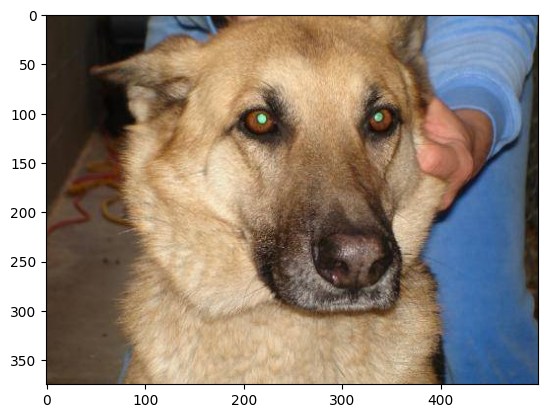

In [11]:
plt.imshow(dog_array)
plt.show()

### 3.5 - Refaire le même travail avec l'image d'un cat depuis le dossier train

In [12]:
cat_path = train_path + '/cats/' + os.listdir(train_path+'/cats')[111]
cat_array = imread(cat_path)

In [13]:
cat_array.shape

(314, 360, 3)

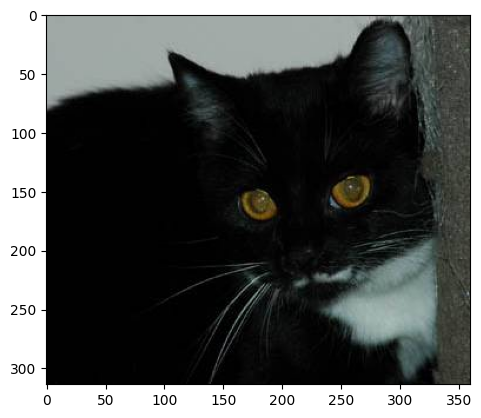

In [14]:
plt.imshow(cat_array)
plt.show()

## 4) Créer un ImageDataGenerator qui effectue un retraitement "pertinent" de ces images:

In [15]:
dim1 = []
dim2 = []
for image_filename in os.listdir(train_path+'/cats'):

    img = imread(train_path+'/cats'+'/'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

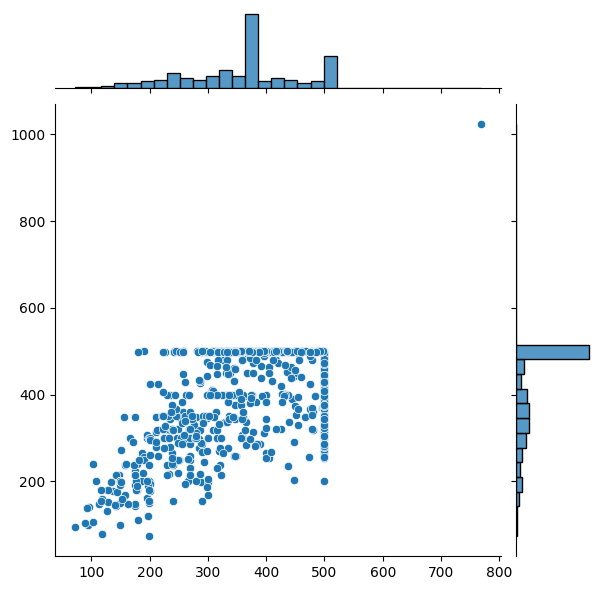

In [16]:
sns.jointplot(x = dim1,y = dim2)

In [17]:
dim3 = []
dim4 = []
for image_filename in os.listdir(train_path+'/dogs'):

    img = imread(train_path+'/dogs'+'/'+image_filename)
    d3,d4,colors = img.shape
    dim3.append(d3)
    dim4.append(d4)

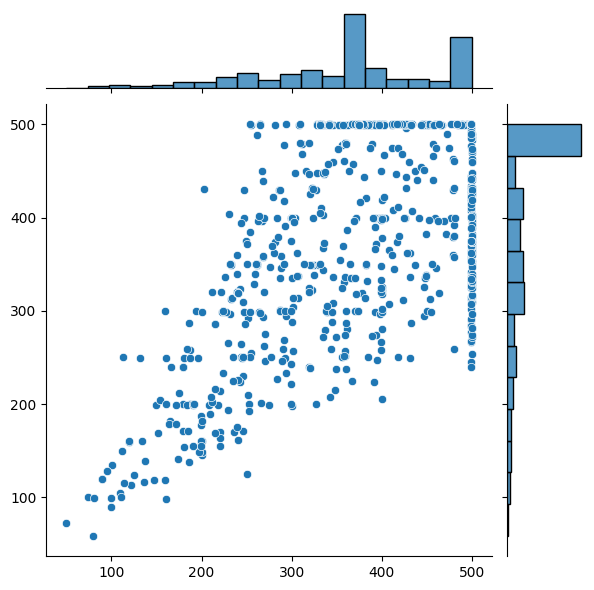

In [18]:
sns.jointplot(x = dim3,y = dim4)


In [19]:
print(np.mean(dim1),np.mean(dim2))

print(np.mean(dim3),np.mean(dim4))

354.542 410.67
363.293 397.275


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
train_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
test_datagen = ImageDataGenerator(rescale=1./255)
#for test data we are only interested in scalling it

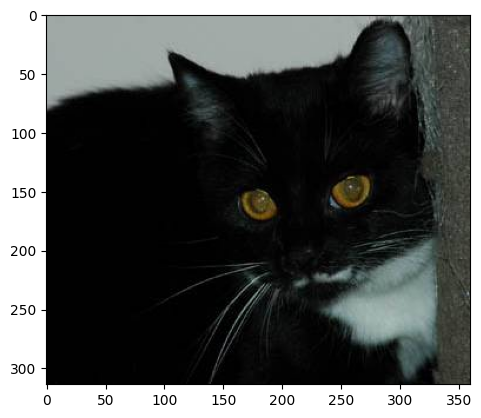

In [23]:
# example before image_generator
plt.imshow(cat_array)

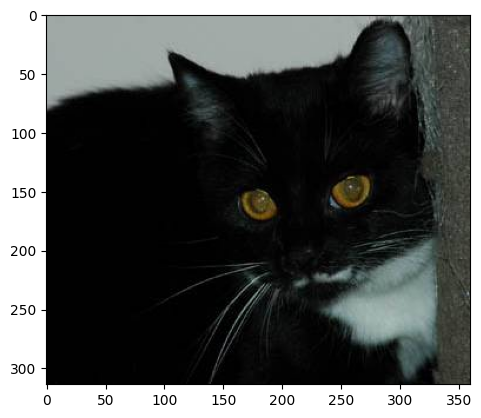

In [24]:
# same example after image_generator
plt.imshow(train_datagen.random_transform(cat_array))

## 5) Construire un modèle CNN from scratch pour la classification binaire de ces images:


**- Utiliser à minima les types layers suivants: Conv2D, MaxPooling2D, Dense.**

**- Utiliser également la technique du Dropout.**

**- Prendre un input_shape arbitraire fixe et approprié**

**- Print le model summary**

**- Ne pas hésiter à ajouter des techniques ou des méthodes sur les données ou le modèle pour améliorer la performance !**

**L'objectif est de maximiser l'accuracy sur les données de test**

In [35]:
BATCH = 32
IMG_SIZE = 250
CHANNELS = 3
SEED = 42

In [26]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization

In [27]:
keras.backend.clear_session()
# To Clear the Session

In [32]:
# Create the CNN model

def create_cnn_model(input_shape):
    model = Sequential()

    # Block 1
    model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=input_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Block 2
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu',))
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.25))

    # Block 3
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.25))

    # Head 1
    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.5))


    # Its binary so we use sigmoid
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [36]:
model = create_cnn_model((IMG_SIZE, IMG_SIZE, CHANNELS))

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 124, 124, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 124, 124, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 61, 61, 32)        0

### 5.2 Créer une instance de EarlyStopping

In [38]:
# Create EarlyStopping instance
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [39]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=1e-7,
    restore_best_weights=True,
)

plateau = ReduceLROnPlateau(
    monitor='val_loss',
    factor = 0.2,
    patience = 2,
    min_delt = 1e-7,
    cooldown = 0,
    verbose = 1
)

### 5.3 Créer un generator pour le train et validation set:

In [40]:
BATCH_SIZE = 64
SEED = 42

In [41]:
# Create the train_image_generator
train_image_generator =train_datagen.flow_from_directory(train_path,
                                  class_mode='binary',
                                  target_size=(IMG_SIZE, IMG_SIZE),
                                  shuffle=True,
                                  seed=SEED,
                                  batch_size=BATCH)

Found 2000 images belonging to 2 classes.


In [42]:
# Create the validation_image_generator
test_image_generator = test_datagen.flow_from_directory(test_path,
                                 class_mode='binary',
                                 target_size=(IMG_SIZE, IMG_SIZE),
                                 shuffle=False,
                                 seed=SEED,
                                 batch_size=BATCH)

Found 1000 images belonging to 2 classes.


In [43]:
# verify the classes dictionary (1 is dog or cat ?)
train_image_generator.class_indices

{'cats': 0, 'dogs': 1}

### 5.3 Entrainer le modèle à partir du train_image_generator et utiliser le EarlyStopping

In [44]:
import warnings
warnings.filterwarnings('ignore')

In [45]:
# suivre à la fois la loss, accuracy, val_loss et val_accuracy

results = model.fit_generator(train_image_generator,
                              steps_per_epoch=len(train_image_generator),
                              epochs=25,
                              validation_data=test_image_generator,
                              validation_steps=len(test_image_generator),
                              callbacks=[early_stopping, plateau])

Epoch 1/25
63/63 [==============================] - 244s 4s/step - loss: 0.8468 - accuracy: 0.4980 - val_loss: 0.6917 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/25
63/63 [==============================] - 12s 192ms/step - loss: 0.6799 - accuracy: 0.5260 - val_loss: 0.6570 - val_accuracy: 0.6140 - lr: 0.0010
Epoch 3/25
63/63 [==============================] - 12s 193ms/step - loss: 0.6564 - accuracy: 0.5790 - val_loss: 0.6458 - val_accuracy: 0.6120 - lr: 0.0010
Epoch 4/25
63/63 [==============================] - 12s 182ms/step - loss: 0.6559 - accuracy: 0.6055 - val_loss: 0.6783 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/25
63/63 [==============================] - ETA: 0s - loss: 0.6427 - accuracy: 0.6050
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
63/63 [==============================] - 11s 173ms/step - loss: 0.6427 - accuracy: 0.6050 - val_loss: 0.6574 - val_accuracy: 0.5970 - lr: 0.0010
Epoch 6/25
63/63 [==============================] - 12s 194ms/

## 8) Evaluation du modèle

### 8.1 Sauvegarder les losses dans un dataframe

In [46]:
losses = pd.DataFrame(model.history.history)

### 8.2 Plot le training et validation loss

<Axes: >

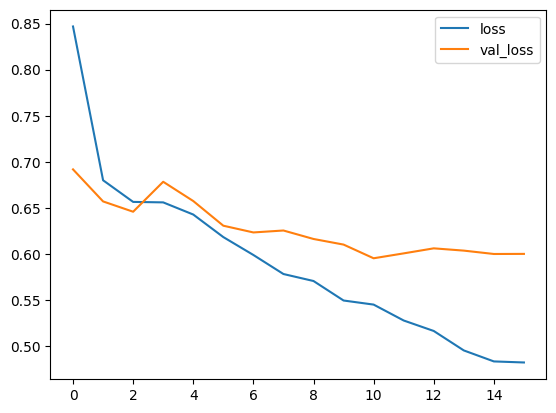

In [47]:
losses[['loss','val_loss']].plot()

### 8.3 Calculer les probabilités pour le validation image generator

In [48]:
y_pred_proba = model.predict_generator(test_image_generator)

In [49]:
y_pred_proba

array([[0.32660115],
       [0.3881138 ],
       [0.2431146 ],
       [0.23443925],
       [0.43878844],
       [0.2499351 ],
       [0.42243296],
       [0.2870782 ],
       [0.3477645 ],
       [0.45884982],
       [0.4854651 ],
       [0.14939965],
       [0.45837724],
       [0.57695603],
       [0.21643154],
       [0.43951166],
       [0.28670964],
       [0.24022542],
       [0.43918502],
       [0.46070263],
       [0.05488334],
       [0.16101345],
       [0.18904176],
       [0.49425584],
       [0.3887542 ],
       [0.46394503],
       [0.5228505 ],
       [0.54286623],
       [0.6651559 ],
       [0.47442186],
       [0.2773908 ],
       [0.51858145],
       [0.43835232],
       [0.41540295],
       [0.3407275 ],
       [0.48086956],
       [0.37210965],
       [0.29994243],
       [0.41698444],
       [0.3401813 ],
       [0.42960146],
       [0.30658802],
       [0.43045017],
       [0.370661  ],
       [0.2571334 ],
       [0.43057337],
       [0.3466717 ],
       [0.350

### 8.4 Transformer ces probabilités en classes en prenant un threshold de 0.5

In [50]:
y_pred_class = y_pred_proba > 0.5

### 8.5 Récupérer le vecteur des true labels à partir du validation image generator

In [51]:
y_test = y_pred_class

In [52]:
y_test

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [

### 8.6 Afficher le classification report et la matrice de confusion

In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
print(classification_report(test_image_generator.classes,y_test))

              precision    recall  f1-score   support

           0       0.63      0.82      0.72       500
           1       0.75      0.53      0.62       500

    accuracy                           0.67      1000
   macro avg       0.69      0.67      0.67      1000
weighted avg       0.69      0.67      0.67      1000



### 8.7 KPI final: quel est l'accuracy du model sur les données de test ? Etes-vous satisfaits de la performance de votre modèle ?

In [55]:
confusion_matrix(y_test, test_image_generator.classes)

array([[411, 237],
       [ 89, 263]])

# 9) Prédictions sur des cas particuliers

### 9.1 Afficher quelques images des données de test où le modèle s'est trompé.

In [56]:
from tensorflow.keras.preprocessing import image

In [58]:
cat_path

'/content/drive/MyDrive/Colab Notebooks/data_cats_and_dogs/train/cats/cat.910.jpg'

In [59]:
my_image = image.load_img(cat_path,target_size=(350,350,3))

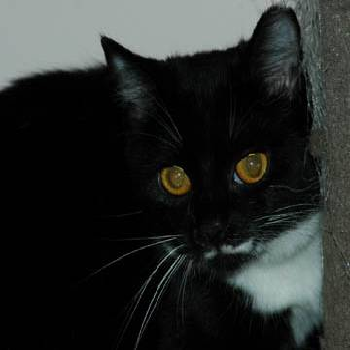

In [60]:
my_image

In [61]:
type(my_image)

PIL.Image.Image

In [62]:
df=pd.DataFrame(y_test)

In [63]:
df.head()

,0
0,False
1,False
2,False
3,False
4,False


In [64]:
df.rename(columns={0:'pred'},inplace=True)

In [65]:
df['actual']=test_image_generator.classes

In [66]:
df.head()

,pred,actual
0,False,0
1,False,0
2,False,0
3,False,0
4,False,0


In [67]:
df.shape

(1000, 2)

In [68]:
df['pred'].replace({False:0, True:1},inplace=True)

In [69]:
df[(df['pred']==1) & (df['actual']==0)]

,pred,actual
13,1,0
26,1,0
27,1,0
28,1,0
31,1,0
...,...,...
467,1,0
474,1,0
476,1,0
488,1,0


In [70]:
x=os.listdir(test_path + "/cats")

In [74]:
plt.imread(test_path + r"/cats/" + x[13]).shape

(338, 449, 3)

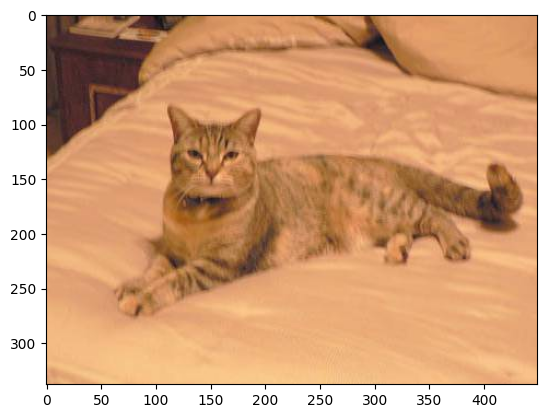

In [75]:
plt.imshow(plt.imread(test_path + "/cats/" + x[13]))

### 9.2 Ces images ont-elles des patterns en commun ?

# 10) Data augmentation (optionnel)

Utiliser des techniques de Data augmentation. L'objectif est d'enrichir le training set à partir des images initiales afin d'améliorer la performance du modèle.

Votre accuracy s'améliore t-elle post votre data augmentation ?

Vous êtes libre de structurer cette partie comme vous le jugez pertinent.

In [135]:
IMG_WIDTH, IMG_HEIGHT, CHANNELS = 250, 250, 3
BATCH_SIZE= 64
SEED = 42

In [136]:
train_datagen_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
# Other than rescaling we introduce some random transformations to train images for better learning. Hopefully!

In [137]:
# Create the train_image_generator introducing some noise
train_image_generator =train_datagen_aug.flow_from_directory(train_path,
                                  class_mode='binary',
                                  target_size=(IMG_WIDTH, IMG_HEIGHT),
                                  shuffle=True,
                                  seed=SEED,
                                  batch_size=BATCH_SIZE)

Found 2000 images belonging to 2 classes.


In [71]:
# Create the validation_image_generator
test_image_generator = test_datagen.flow_from_directory(test_path,
                                 class_mode='binary',
                                 target_size=(IMG_WIDTH, IMG_HEIGHT),
                                 shuffle=False,
                                 seed=SEED,
                                 batch_size=BATCH_SIZE)

Found 1000 images belonging to 2 classes.


In [138]:
model_data_aug = create_cnn_model((IMG_WIDTH, IMG_HEIGHT, CHANNELS))
model_data_aug.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 124, 124, 32)      0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 124, 124, 32)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 122, 122, 32)      9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 61, 61, 32)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 61, 61, 32)       

In [139]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=1e-7,
    restore_best_weights=True,
)

plateau = ReduceLROnPlateau(
    monitor='val_loss',
    factor = 0.2,
    patience = 2,
    min_delt = 1e-7,
    cooldown = 0,
    verbose = 1
)

In [141]:
results_data_aug = model_data_aug.fit_generator(train_image_generator,
                              epochs=25,
                              validation_data=test_image_generator,
                              callbacks=[early_stopping, plateau])

Epoch 1/25
32/32 [==============================] - 50s 1s/step - loss: 0.8344 - accuracy: 0.5060 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/25
32/32 [==============================] - 47s 1s/step - loss: 0.6930 - accuracy: 0.5060 - val_loss: 0.6931 - val_accuracy: 0.5010 - lr: 0.0010
Epoch 3/25
32/32 [==============================] - ETA: 0s - loss: 0.6920 - accuracy: 0.5120
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
32/32 [==============================] - 48s 1s/step - loss: 0.6920 - accuracy: 0.5120 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/25
32/32 [==============================] - 50s 2s/step - loss: 0.6926 - accuracy: 0.5140 - val_loss: 0.6928 - val_accuracy: 0.5000 - lr: 2.0000e-04
Epoch 5/25
32/32 [==============================] - 49s 2s/step - loss: 0.6903 - accuracy: 0.5475 - val_loss: 0.6906 - val_accuracy: 0.5340 - lr: 2.0000e-04
Epoch 6/25
32/32 [==============================] - 49s 2s/step - l

# 11) Transfer learning

Utiliser la technique de transfer learning à partir d'un modèle open *source* qui vous semble pertinent. Justifier le choix du modèle ?

Au final, votre accuracy s'est elle améliorée significativement ?

Vous êtes libre de structurer cette partie comme vous le jugez pertinent.

In [142]:
from tensorflow.keras.applications import MobileNet

In [143]:
# Defining a function to call a pre trained model for transfer learning : MobileNet in our case

def build_transfer_model(base_model):

    model = Sequential()

    model.add(base_model)
    for layer in model.layers[:]:
        layer.trainable = False

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))

    model.add(Dense(64, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

    return model

# MobileNet input_shape should be (224, 224, 3)
mobile_net_model = build_transfer_model(MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3)))



17225924/17225924 [==============================] - 1s 0us/step


In [144]:
mobile_net_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 7, 7, 1024)        3228864   
 onal)                                                           
                                                                 
 flatten_3 (Flatten)         (None, 50176)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               6422656   
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9659841 (36.85 MB)
Trainable params: 6430977 (24.53 MB)
Non-trainable params: 3228864 (12.32 MB)
_________

In [145]:
IMG_WIDTH, IMG_HEIGHT, CHANNELS = 224, 224, 3
BATCH_SIZE= 64
SEED = 42

In [146]:
train_image_generator =train_datagen_aug.flow_from_directory(train_path,
                                  class_mode='binary',
                                  target_size=(IMG_WIDTH, IMG_HEIGHT),
                                  shuffle=True,
                                  seed=SEED,
                                  batch_size=BATCH_SIZE)

Found 2000 images belonging to 2 classes.


In [147]:
test_image_generator = test_datagen.flow_from_directory(test_path,
                                 class_mode='binary',
                                 target_size=(IMG_WIDTH, IMG_HEIGHT),
                                 shuffle=False,
                                 seed=SEED,
                                 batch_size=BATCH_SIZE)

Found 1000 images belonging to 2 classes.


In [148]:
early_stopping = EarlyStopping(patience=5,restore_best_weights=True)
learning_rate_decay = ReduceLROnPlateau(patience=3)

In [149]:
results_mobilenet = mobile_net_model.fit(train_image_generator,
                                 epochs = 30,
                                 callbacks=[early_stopping,
                                            learning_rate_decay],
                                 validation_data=test_image_generator)

Epoch 1/30
32/32 [==============================] - 43s 1s/step - loss: 2.0832 - binary_accuracy: 0.8575 - val_loss: 0.0859 - val_binary_accuracy: 0.9830 - lr: 0.0010
Epoch 2/30
32/32 [==============================] - 40s 1s/step - loss: 0.1219 - binary_accuracy: 0.9695 - val_loss: 0.0416 - val_binary_accuracy: 0.9850 - lr: 0.0010
Epoch 3/30
32/32 [==============================] - 40s 1s/step - loss: 0.1180 - binary_accuracy: 0.9685 - val_loss: 0.0314 - val_binary_accuracy: 0.9900 - lr: 0.0010
Epoch 4/30
32/32 [==============================] - 39s 1s/step - loss: 0.1270 - binary_accuracy: 0.9740 - val_loss: 0.0392 - val_binary_accuracy: 0.9870 - lr: 0.0010
Epoch 5/30
32/32 [==============================] - 40s 1s/step - loss: 0.0636 - binary_accuracy: 0.9770 - val_loss: 0.0471 - val_binary_accuracy: 0.9830 - lr: 0.0010
Epoch 6/30
32/32 [==============================] - 39s 1s/step - loss: 0.0470 - binary_accuracy: 0.9845 - val_loss: 0.0438 - val_binary_accuracy: 0.9870 - lr: 0.001

In [150]:
mobile_net_model.save('MobileNet_clf')

# 12) Déploiement

À partir du modèle définitif que vous aurez construit et sauvegardé sur Keras, vous devez créer une webapp où l'utilisateur peut se connecter à l'URL, charger une image de chien ou chat et obtenir en retour la prédiction du modèle.

Stack recommandé: streamlit pour le développement de la webapp & render pour le hosting

In [151]:
import pickle
pickle.dump(mobile_net_model,open('mobile_net_model.pkl','wb'))

In [76]:
import pickle
pickle.dump(model,open('model.pkl','wb'))

# Fin du projet!

Au final, vous devez remettre à l'équipe pédagogique:

### 1 - Ce notebook rempli avec les outputs visibles
### 2 - Le lien URL de votre application web